0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


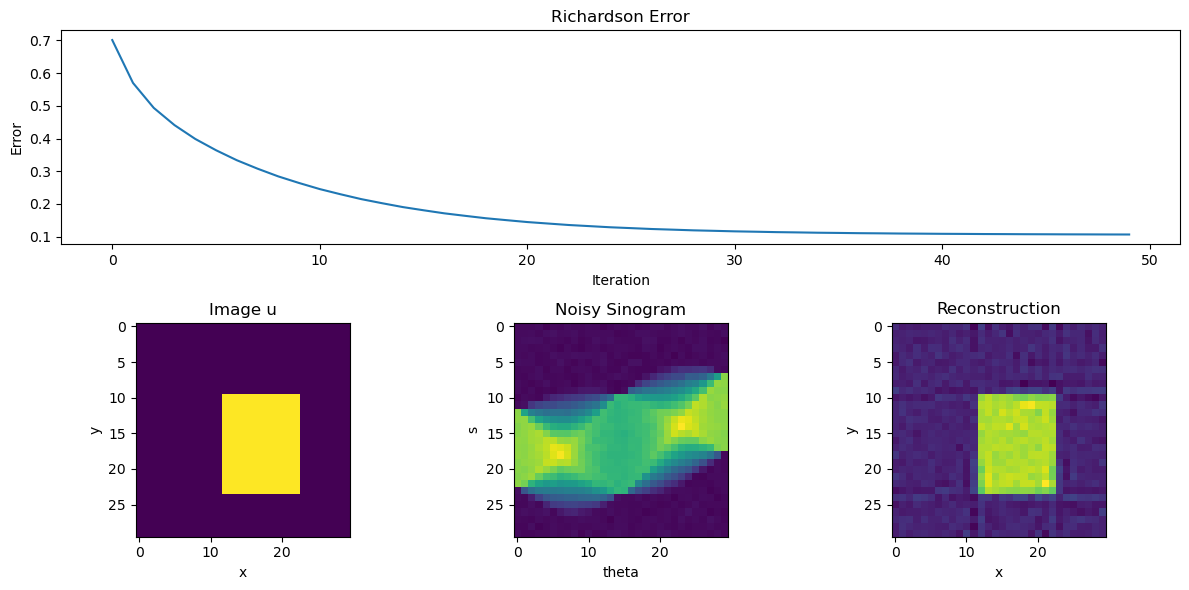

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def ray(n, s, theta):
    """
    Trace ray through volume [-1,1]^2, discretised with n x n pixels.
    
    Returns intersection lengths and linear indices of intersected pixels
    """
    h = 2/n
    x = -1 + np.linspace(0,n,n+1)*h
    y = -1 + np.linspace(0,n,n+1)*h
    t = []
    if np.abs(np.sin(theta)) > 0:
        tx = (x - s*np.cos(theta))/np.sin(theta)
        t = np.concatenate((t,tx))
    if np.abs(np.cos(theta)) > 0:
        ty = -(y - s*np.sin(theta))/np.cos(theta)
        t = np.concatenate((t,ty))
    t = np.sort(t[np.isfinite(t)])
    nt = len(t)
    I = []
    w = []
    for i in range(nt-1):
        x1 = t[i]*np.sin(theta) + s*np.cos(theta)
        y1 = -t[i]*np.cos(theta) + s*np.sin(theta)
        x2 = t[i+1]*np.sin(theta) + s*np.cos(theta)
        y2 = -t[i+1]*np.cos(theta) + s*np.sin(theta)
        ix = int(((x1 + x2)/2+1)//h)
        iy = int(((y1 + y2)/2+1)//h)
        if (0 <= ix < n) and (0 <= iy < n):
            I.append(int(iy*n + ix))
            w.append(t[i+1] - t[i])
    return I, w

def Radon(u, n, s, theta):
    ns = len(s)
    nt = len(theta)
    f = np.zeros(ns*nt)
    for i in range(nt):
        for j in range(ns):
            J, w = ray(n, s[j], theta[i])
            f[i*ns + j] = np.array(w).dot(u[J])
    return f

def RadonTranspose(f, n, s, theta):
    ns = len(s)
    nt = len(theta)
    u = np.zeros(n*n)
    for i in range(nt):
        for j in range(ns):
            J, w = ray(n, s[j], theta[i])
            u[J] += np.array(w) * f[i*ns + j]
    return u

# settings
nx = 30
na = nx # set these to be the same for easier reshaping later on
h = 2/nx
s = np.linspace(-1 + h/2, 1 - h/2, nx)
theta = np.linspace(0, np.pi, na)
sigma = 0.01
niter = 50 # number of iterations
alpha = 0.5

# simple example image u
u = np.zeros((nx, nx))
u[nx//2-nx//6:2*nx//3+nx//7, nx//2-nx//8:2*nx//3+nx//8] = 1
u = u.ravel()

# make the sinogram noisy
f = Radon(u, nx, s, theta)
f_noisy = f + sigma * np.random.randn(len(f))

# perform Richardson iteration
e_ric = np.zeros(niter)
u_ric = np.zeros(nx*nx)
for i in range(niter):
    print(i) # show how far we are into iteration process
    res = Radon(u_ric, nx, s, theta) - f_noisy
    du = RadonTranspose(res, nx, s, theta)
    u_ric -= alpha * du
    e_ric[i] = np.linalg.norm(u_ric - u) / np.linalg.norm(u)

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 3, figure=fig)

# we want the first plot to occupy the entire first row
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(e_ric)
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Error")
ax1.set_title("Richardson Error")

# second row shared by three plots
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(u.reshape(nx,nx))
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Image u")

ax3 = fig.add_subplot(gs[1, 1])
ax3.imshow(f_noisy.reshape(nx,nx).T)
ax3.set_xlabel("theta")
ax3.set_ylabel("s")
ax3.set_title("Noisy Sinogram")

ax4 = fig.add_subplot(gs[1, 2])
ax4.imshow(u_ric.reshape(nx,nx))
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("Reconstruction")

fig.tight_layout()
plt.savefig("/Users/Senne/Downloads/richardson.png")


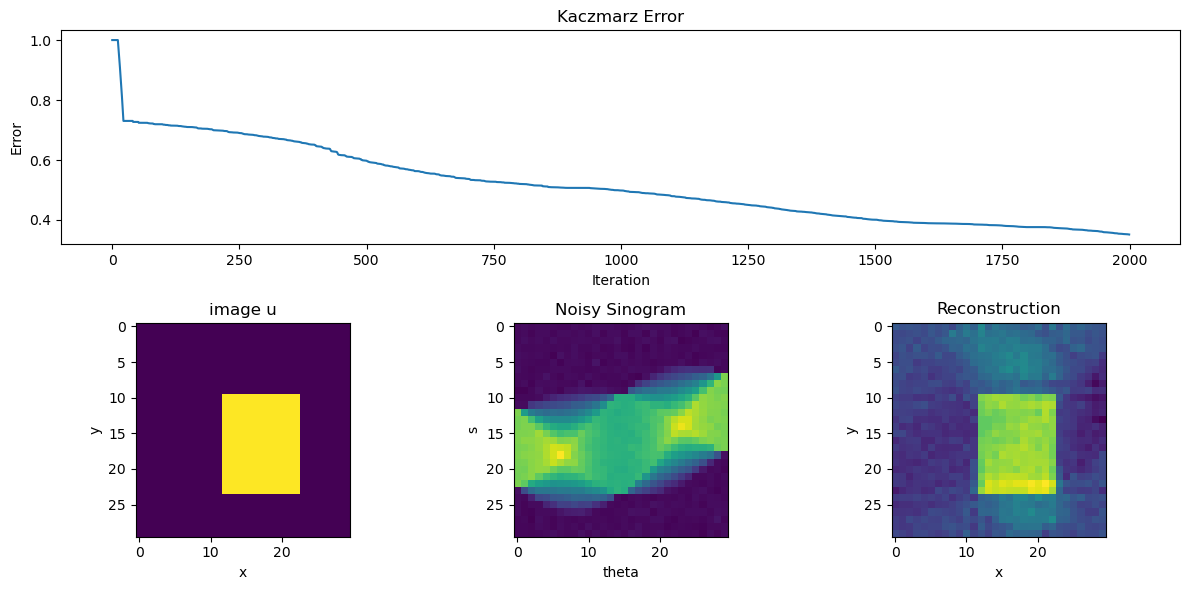

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def ray(n, s, theta):
    """
    Trace ray through volume [-1,1]^2, discretised with n x n pixels.
    
    Returns intersection lengths and linear indices of intersected pixels
    """
    h = 2/n
    x = -1 + np.linspace(0,n,n+1)*h
    y = -1 + np.linspace(0,n,n+1)*h
    t = []
    if np.abs(np.sin(theta)) > 0:
        tx = (x - s*np.cos(theta))/np.sin(theta)
        t = np.concatenate((t,tx))
    if np.abs(np.cos(theta)) > 0:
        ty = -(y - s*np.sin(theta))/np.cos(theta)
        t = np.concatenate((t,ty))
    t = np.sort(t[np.isfinite(t)])
    nt = len(t)
    I = []
    w = []
    for i in range(nt-1):
        x1 = t[i]*np.sin(theta) + s*np.cos(theta)
        y1 = -t[i]*np.cos(theta) + s*np.sin(theta)
        x2 = t[i+1]*np.sin(theta) + s*np.cos(theta)
        y2 = -t[i+1]*np.cos(theta) + s*np.sin(theta)
        ix = int(((x1 + x2)/2+1)//h)
        iy = int(((y1 + y2)/2+1)//h)
        if (0 <= ix < n) and (0 <= iy < n):
            I.append(int(iy*n + ix))
            w.append(t[i+1] - t[i])
    return I, w

def Radon(u, n, s, theta):
    ns = len(s)
    nt = len(theta)
    f = np.zeros(ns*nt)
    for i in range(nt):
        for j in range(ns):
            J, w = ray(n, s[j], theta[i])
            f[i*ns + j] = np.array(w).dot(u[J])
    return f

def RadonTranspose(f, n, s, theta):
    ns = len(s)
    nt = len(theta)
    u = np.zeros(n*n)
    for i in range(nt):
        for j in range(ns):
            J, w = ray(n, s[j], theta[i])
            u[J] += np.array(w) * f[i*ns + j]
    return u

# settings
nx = 30
na = nx # set these to be the same for easier reshaping later on
h = 2/nx
s = np.linspace(-1 + h/2, 1 - h/2, nx)
theta = np.linspace(0, np.pi, na)
sigma = 0.01
niter = 2000 # number of iterations
alpha = 0.5

# simple example image u
u = np.zeros((nx, nx))
u[nx//2-nx//6:2*nx//3+nx//7, nx//2-nx//8:2*nx//3+nx//8] = 1
u = u.ravel()

# make the sinogram noisy
f = Radon(u, nx, s, theta)
f_noisy = f + sigma * np.random.randn(len(f))

# perform Kacmarz iteration
e_kaz = np.zeros(niter)
u_kaz = np.zeros(nx*nx)
i = 0
for i in range(niter):
    j = np.mod(i, nx*na)
    sj = j % na
    tj = j // na
    kj = RadonTranspose([1], nx, [s[sj]], [theta[tj]])

    u_kaz += kj * (f_noisy[j] - kj.dot(u_kaz))/np.linalg.norm(kj)**2

    e_kaz[i] = np.linalg.norm(u_kaz - u)/np.linalg.norm(u)

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 3, figure=fig)

# we want the first plot to occupy the entire first row
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(e_kaz)
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Error")
ax1.set_title("Kaczmarz Error")

# second row shared by three plots
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(u.reshape(nx,nx))
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("image u")

ax3 = fig.add_subplot(gs[1, 1])
ax3.imshow(f_noisy.reshape(nx,nx).T)
ax3.set_xlabel("theta")
ax3.set_ylabel("s")
ax3.set_title("Noisy Sinogram")

ax4 = fig.add_subplot(gs[1, 2])
ax4.imshow(u_kaz.reshape(nx,nx))
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("Reconstruction")

fig.tight_layout()
plt.savefig("/Users/Senne/Downloads/Kaczmarz.png")
